# Hybrid Collaboritve and Content Based Neurel Network Recommender System

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv("../data/ml-latest-small/movies.csv")
movies['genres'] = movies['genres'].str.split('|')
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [ ]:
# Load the tags dataset
tags = pd.read_csv('../data/ml-latest/tags_filtered_200.csv')
print(tags.shape)
tags.head()

(492004, 4)


,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,260,sci-fi,1442169410
2,14,318,imdb top 250,1442615195
3,14,318,justice,1442615192
4,14,1682,philosophy,1442615158


In [ ]:
# Load the ratings dataset
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
ratings = ratings.drop('timestamp',axis=1)
print(ratings.shape)
ratings.head()

(100836, 3)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## Exploratory Data Analysis

In [24]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS

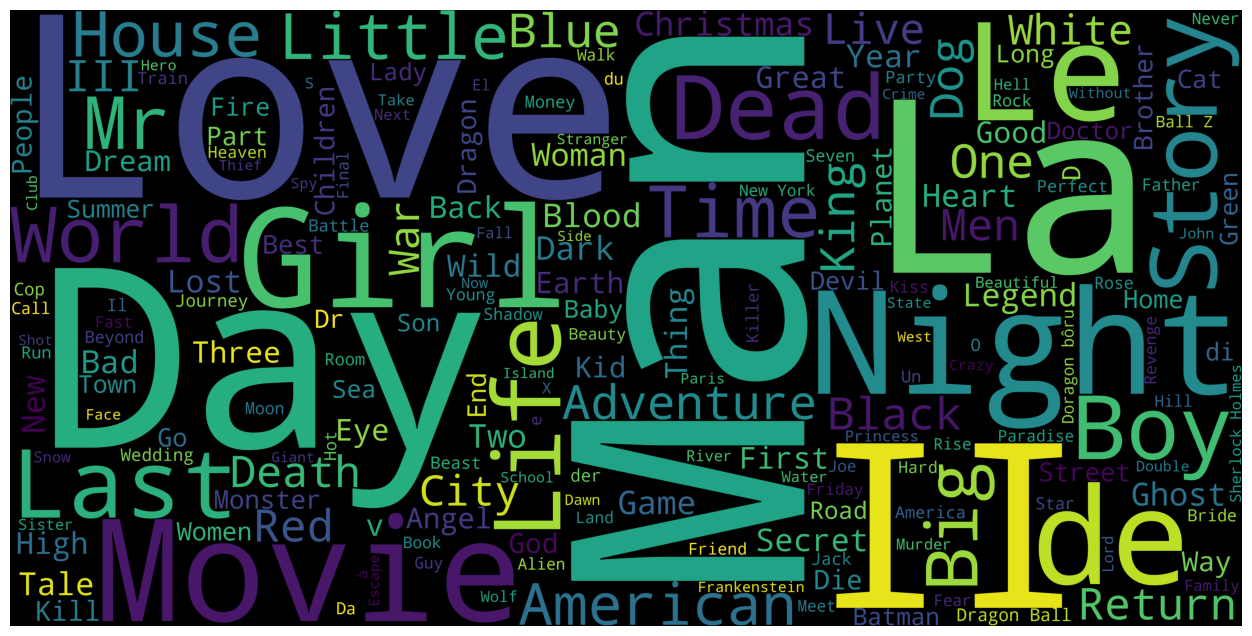

In [25]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

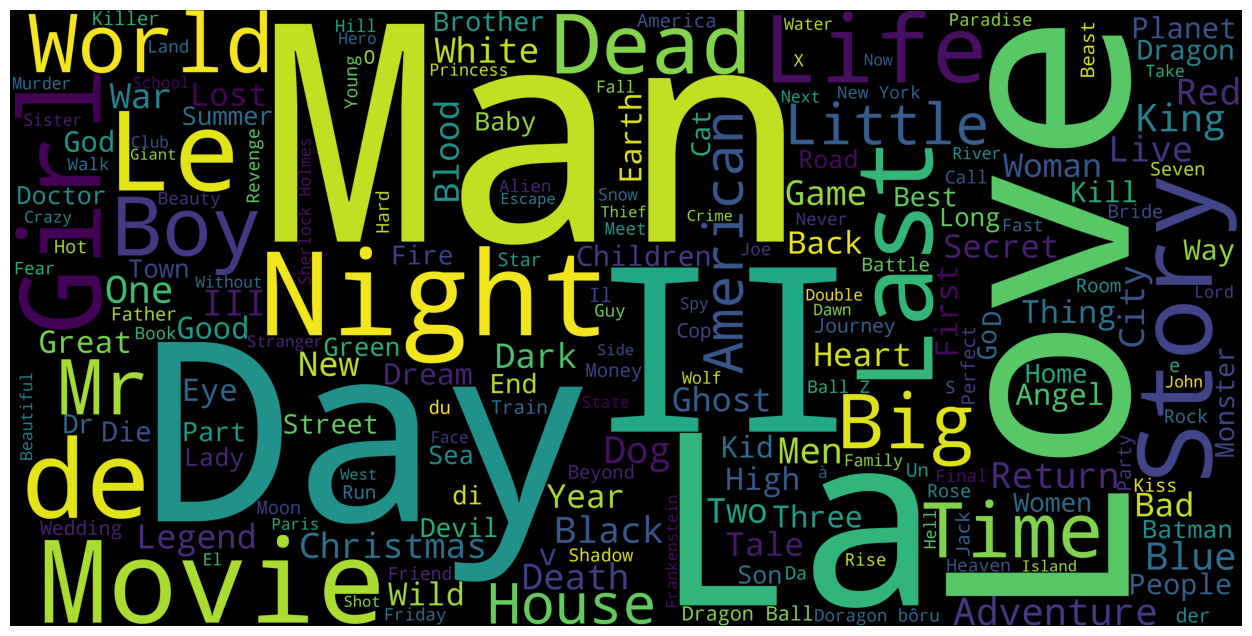

In [26]:
# Create a wordcloud of the tags titles
tag_corpus = ' '.join(tags['tag'])
tag_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(tag_wordcloud)
plt.axis('off')
plt.show()

In [27]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [30]:
average_ratings_per_user = ratings.groupby('userId').size().mean()
print("Average number of ratings per user: {:.2f}".format(average_ratings_per_user))

Average number of ratings per user: 165.30


In [31]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

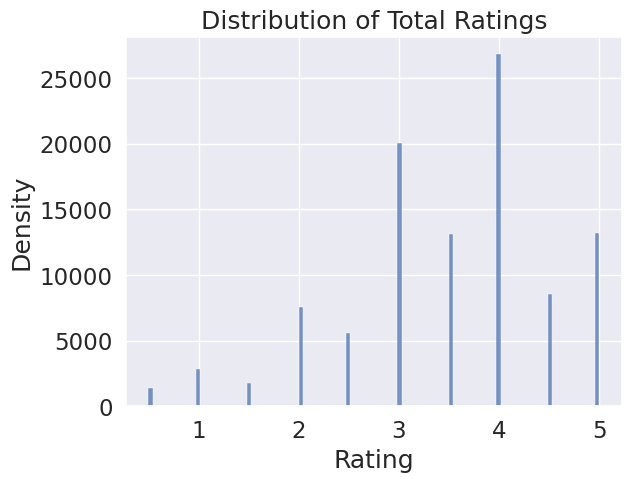

In [32]:
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.histplot(ratings['rating'].fillna(ratings['rating'].median()))

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Total Ratings')

plt.show()

## Data Cleaning and Processing

In [161]:
## for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer

In [162]:
# Normalize the ratings between 0 and 1
max_rating = ratings['rating'].max()
min_rating = ratings['rating'].min()
print('Maximum Rating:', max_rating)
print('Minimum Rating:', min_rating)

ratings['rating'] = (ratings['rating'] - min_rating) / (max_rating - min_rating)
ratings.head()

Maximum Rating: 5.0
Minimum Rating: 0.5


,userId,movieId,rating
0,1,1,0.777778
1,1,3,0.777778
2,1,6,0.777778
3,1,47,1.000000
4,1,50,1.000000


In [163]:
movies = movies[movies['movieId'].isin(tags['movieId'])]
movies = movies.reset_index(drop=True)

ratings = ratings[ratings['movieId'].isin(tags['movieId'])]
ratings = ratings.reset_index(drop=True)

In [164]:
print(f"There are: {ratings['userId'].nunique()} unqiue users")
print(f"There are: {ratings['movieId'].nunique()} unqiue films in the ratings dataframe")
print(f"There are: {movies['movieId'].nunique()} unqiue films in the movies dataframe")
print(f"There are: {tags['movieId'].nunique()} unqiue films in the tags dataframe")


There are: 610 unqiue users
There are: 9186 unqiue films in the ratings dataframe
There are: 9186 unqiue films in the movies dataframe
There are: 9186 unqiue films in the tags dataframe


### Tag Data Cleaning

In [8]:
# Load the tags dataset
tags = pd.read_csv('../data/ml-latest/tags.csv')
print(tags.shape)
tags = tags.dropna()
tags.head()

(1108997, 4)


,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [9]:
print("Unique Users:", tags['userId'].nunique())
print("\nUnique Tags:", tags['tag'].nunique())
print("\nNo. of NaN Values:\n", tags.isna().sum())

Unique Users: 19325

Unique Tags: 74714

No. of NaN Values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [10]:
tags = tags[tags['movieId'].isin(movies['movieId'])]
tags = tags.reset_index(drop=True)
print(tags.shape)
tags.head()

(869911, 4)


,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195


In [11]:
print("Unique Users:", tags['userId'].nunique())
print("\nUnique Tags:", tags['tag'].nunique())
print("\nNo. of NaN Values:\n", tags.isna().sum())

Unique Users: 18448

Unique Tags: 54600

No. of NaN Values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [124]:
#remove tags that occur less than 200 times from the tags dataframe
from collections import Counter

#get values for every tag and count the occurances
all_tags = tags['tag'].values
tag_counts = Counter(all_tags)

# Sort the tags by their frequencies in descending order 
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted tags(its a very long output)
# for tag, count in sorted_tags:
#     print(tag, count)

# Create a list of tags to remove (occurring less than 200 times)
no_of_tag_occurances = 200
tags_to_remove = [tag for tag, count in tag_counts.items() if count < no_of_tag_occurances]
print(len(tags_to_remove), "tags to be removed from dataframe")

#iterate through tags dataframe and find the index numbers of rows to be removed
index_to_remove = []
for num, tag in enumerate(tags['tag']):
    if tag in tags_to_remove:
        index_to_remove.append(num)
        
tags = tags.drop(index_to_remove)
tags = tags.reset_index(drop=True)
print(tags.shape)
tags.head()



215 tags to be removed from dataframe
(492004, 4)


,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,260,sci-fi,1442169410
2,14,318,imdb top 250,1442615195
3,14,318,justice,1442615192
4,14,1682,philosophy,1442615158


In [125]:
print("Unique Tags:", tags['tag'].nunique())
print("\nNo. of NaN Values:\n", tags.isna().sum())

Unique Tags: 733

No. of NaN Values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [126]:
tags.to_csv('../data/ml-latest/tags_filtered_200.csv', index=False)

### Bring Data Together

In [165]:
#aggregate tags into list by movie id and merge with movies dataframe
tags_agg = tags.groupby('movieId')['tag'].agg(list)
movies_tag_df = pd.merge(movies, tags_agg, how='inner', on='movieId')

#eliminate duplicate tags in tag lists by turning into a set and then back into a list
movies_tag_df['tag'] = movies_tag_df['tag'].apply(lambda tags: list({tag for tag in tags}))

#display dataframe
print(movies_tag_df.shape)
movies_tag_df.head()

(9186, 4)


,movieId,title,genres,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[friendship, pixar, feel-good, National Film R..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[based on a book, Fantasy, family, time travel..."
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[duringcreditsstinger, CLV, sequel, comedy, fu..."
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[chick flick, revenge, divorce, characters, CL..."
4,5,Father of the Bride Part II (1995),[Comedy],"[family, wedding, Fantasy, Comedy, pregnancy, ..."


In [166]:
longest_tag = max(movies_tag_df['tag'], key=len)
len(longest_tag)

147

In [167]:
# Extract the genre information
genres = movies_tag_df['genres'].values

# Perform one-hot encoding on the genre lists
mlb = MultiLabelBinarizer()
genre_features = mlb.fit_transform(genres)

# Retrieve the list of genre classes
genre_classes = mlb.classes_

# Create a new dataframe with the one-hot encoded genre features
genre_df = pd.DataFrame(genre_features, columns=genre_classes)
print(genre_df.shape)
genre_df.head()

(9186, 20)


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


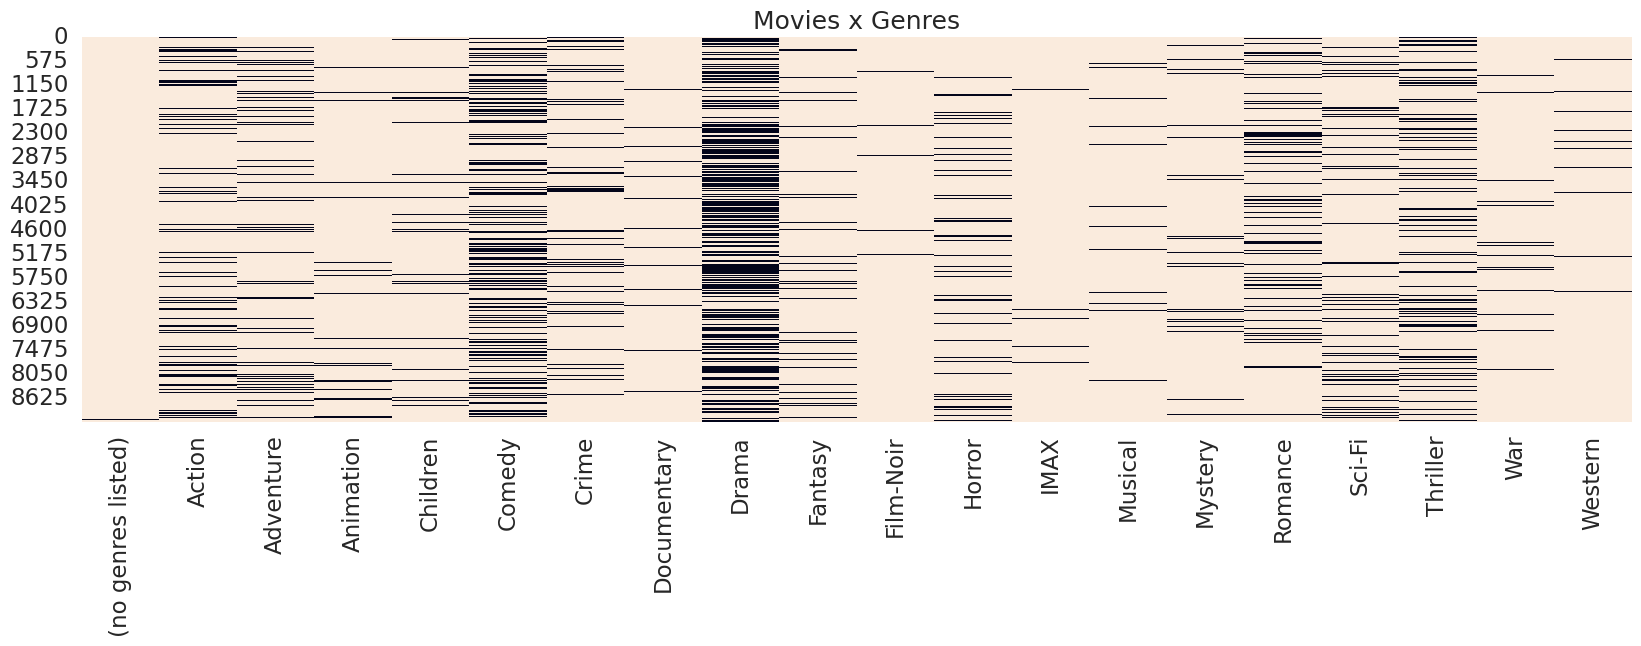

In [139]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(genre_df==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Movies x Genres")
plt.show()

In [168]:
# Extract the tag information
tags = movies_tag_df['tag'].values

# Perform one-hot encoding on the tag lists
mlb = MultiLabelBinarizer()
tag_features = mlb.fit_transform(tags)

# Retrieve the list of tag classes
tag_classes = mlb.classes_

# Create a new dataframe with the one-hot encoded tag features
tag_df = pd.DataFrame(tag_features, columns=tag_classes)
print(tag_df.shape)
tag_df.head()

(9186, 733)


,007,1930s,1950s,1960s,1970s,1980s,19th century,70mm,AFI 100,Action,...,whimsical,wilderness,witch,witty,wizards,woman director,women,writers,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


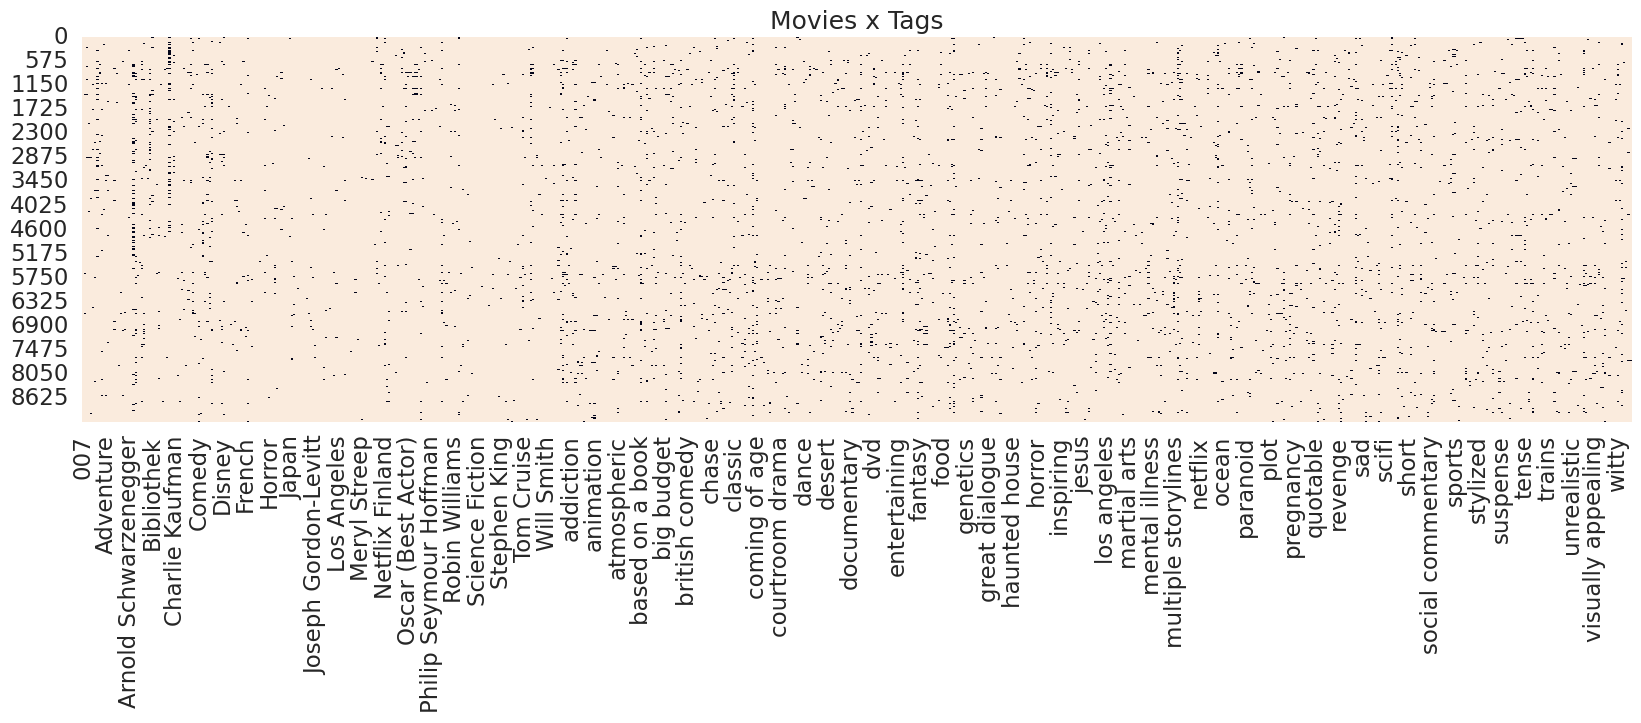

In [141]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(tag_df==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Movies x Tags")
plt.show()

In [169]:
movies_features = pd.concat([movies_tag_df,genre_df,tag_df],axis=1)
print(movies_features.shape)
movies_features.head()

(9186, 757)


,movieId,title,genres,tag,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,whimsical,wilderness,witch,witty,wizards,woman director,women,writers,zombie,zombies
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","[friendship, pixar, feel-good, National Film R...",0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]","[based on a book, Fantasy, family, time travel...",0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]","[duringcreditsstinger, CLV, sequel, comedy, fu...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]","[chick flick, revenge, divorce, characters, CL...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],"[family, wedding, Fantasy, Comedy, pregnancy, ...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [170]:
movielens_df = pd.merge(ratings,movies_features,how='left', on = 'movieId')
movielens_df = movielens_df.drop(['title','genres','tag'],axis=1)
print(movielens_df.shape)
movielens_df.head()

(100009, 756)


,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,whimsical,wilderness,witch,witty,wizards,woman director,women,writers,zombie,zombies
0,1,1,0.777778,0,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,3,0.777778,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,0.777778,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,47,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,50,1.000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Hybrid Filtering with Users, Ratings, Genres and Tags

In [171]:
##for deep learning
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Concatenate, Embedding, Reshape, Dot
from tensorflow.keras.models import Model

In [172]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(movielens_df, test_size=0.2, random_state=42)

# Determine the maximum values of userId and movieId for embedding layer sizes
max_user_id = ratings['userId'].max()
max_movie_id = ratings['movieId'].max()

# Determine the number of genre and tag features
genre_len = len(genre_df.columns)
tag_len = len(tag_df.columns)

# Prepare the input data for the neural network
train_user_ids = train_data['userId'].values
train_movie_ids = train_data['movieId'].values
train_genres = train_data.iloc[:, 3:23].values
train_tags = train_data.iloc[:, 23:].values
train_ratings = train_data['rating'].values

test_user_ids = test_data['userId'].values
test_movie_ids = test_data['movieId'].values
test_genres = test_data.iloc[:, 3:23].values
test_tags = test_data.iloc[:, 23:].values
test_ratings = test_data['rating'].values

In [178]:
def create_hybrid_model(max_user_id, max_movie_id, genre_len, tag_len, embedding_size):
    # Input Layers
    user_input = Input(name='user_input', shape=(1,))
    movie_input = Input(name='movie_input', shape=(1,))
    genre_input = Input(name="genre_input", shape=(genre_len,))
    tag_input = Input(name="tag_input", shape=(tag_len,))
    
    # Collaborative Filtering
    cf_user_embedding = Embedding(name='cf_user_embedding', input_dim=max_user_id+1, output_dim=embedding_size)(user_input)
    cf_user_reshape = Reshape(name='cf_user_reshape', target_shape=(embedding_size,))(cf_user_embedding)
    cf_movie_embedding = Embedding(name='cf_movie_embedding', input_dim=max_movie_id+1, output_dim=embedding_size)(movie_input)
    cf_movie_reshape = Reshape(name='cf_movie_reshape', target_shape=(embedding_size,))(cf_movie_embedding)
    cf_user_movie_dot = Dot(name='cf_user_movie_dot', normalize=True, axes=1)([cf_user_reshape, cf_movie_reshape])

    # Neural Network
    nn_user_embedding = Embedding(name='nn_user_embedding', input_dim=max_user_id+1, output_dim=embedding_size)(user_input)
    nn_user_reshape = Reshape(name='nn_user_reshape', target_shape=(embedding_size,))(nn_user_embedding)
    nn_movie_embedding = Embedding(name='nn_movie_embedding', input_dim=max_movie_id+1, output_dim=embedding_size)(movie_input)
    nn_movie_reshape = Reshape(name='nn_movie_reshape', target_shape=(embedding_size,))(nn_movie_embedding)
    nn_concat = Concatenate()([nn_user_reshape, nn_movie_reshape])
    nn_dense = Dense(name="nn_dense", units=int(embedding_size/2), activation='relu')(nn_concat)

    # Genre Features
    genre_features = Dense(name="genre_features", units=genre_len, activation='relu')(genre_input)

    # Tag Features
    tag_features = Dense(name="tag_features", units=tag_len, activation='relu')(tag_input)

    # Merge all
    pred_ratings = Concatenate()([cf_user_movie_dot, nn_dense, genre_features, tag_features])
    pred_ratings = Dense(name="pred_ratings", units=1, activation='linear')(pred_ratings)

    # Create and compile the model
    model = Model(inputs=[user_input, movie_input, genre_input, tag_input], outputs=pred_ratings, name="hybrid_model")
    model.compile(loss='mse', optimizer='adam')

    return model

In [49]:
# hybrid_model.summary()

In [191]:
# Define the embedding sizes
embedding_size = 50

# Create the hybrid model
hybrid_model = create_hybrid_model(max_user_id, max_movie_id, genre_len, tag_len, embedding_size)

#training inputs
epochs = 5
batch_size = 64

# Train the model
hybrid_model.fit([train_user_ids, train_movie_ids, train_genres, train_tags], train_ratings, epochs = epochs, batch_size=batch_size, shuffle=True, validation_split=0.3)

Epoch 1/5
876/876 [==============================] - 58s 66ms/step - loss: 0.0497 - val_loss: 0.0393
Epoch 2/5
876/876 [==============================] - 54s 61ms/step - loss: 0.0358 - val_loss: 0.0378
Epoch 3/5
876/876 [==============================] - 54s 61ms/step - loss: 0.0205 - val_loss: 0.0413
Epoch 4/5
876/876 [==============================] - 54s 61ms/step - loss: 0.0109 - val_loss: 0.0421
Epoch 5/5
876/876 [==============================] - 54s 61ms/step - loss: 0.0072 - val_loss: 0.0444


In [57]:
# import pickle

# # Save the model as a pickle file
# with open('hybrid_model.pkl', 'wb') as file:
#     pickle.dump(hybrid_model, file)

In [192]:
predictions = hybrid_model.predict([test_user_ids, test_movie_ids, test_genres, test_tags])
print("the highest rating the model predicted is:", np.max(predictions))
rmse = np.sqrt(mean_squared_error(test_ratings, predictions))
print('RMSE:', rmse)

626/626 [==============================] - 1s 1ms/step
the highest rating the model predicted is: 1.2282071
RMSE: 0.20893724809789702


In [193]:
predictions = np.clip(predictions, a_min=0, a_max=1.0)
print("the highest rating the model predicted is:", np.max(predictions))
rmse = np.sqrt(mean_squared_error(test_ratings, predictions))
print('RMSE:', rmse)

the highest rating the model predicted is: 1.0
RMSE: 0.20854760607926606


#### Tune Model for Better Performance

In [ ]:
# Define hyperparameters for tuning (excluding epochs and batch_size)
param_grid = {
    'max_user_id': [max_user_id],
    'max_movie_id': [max_movie_id],
    'genre_len': [genre_len],
    'tag_len': [tag_len],
    'embedding_size': [50, 100],
}

# Manually set a list of values for epochs and batch_size
epochs_list = [5, 10, 20]
batch_size_list = [32, 64, 128, 256]

best_score = None
best_params = {}

# Nested loops for hyperparameter tuning
for embedding_size in param_grid['embedding_size']:
    for batch_size in batch_size_list:
        for epochs in epochs_list:
            # Create the hybrid model
            hybrid_model = create_hybrid_model(max_user_id, max_movie_id, genre_len, tag_len, embedding_size)

            # Train the model
            hybrid_model.fit([train_user_ids, train_movie_ids, train_genres, train_tags], train_ratings, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.3)

            # Evaluate the model performance
            mse_score = -hybrid_model.evaluate([train_user_ids, train_movie_ids, train_genres, train_tags], train_ratings)

            # Keep track of the best hyperparameters based on MSE score
            if best_score is None or mse_score < best_score:
                best_score = mse_score
                best_params = {
                    'embedding_size': embedding_size,
                    'batch_size': batch_size,
                    'epochs': epochs,
                }

print("Best Hyperparameters:", best_params)
print("Best Model Score (MSE):", best_score)

Epoch 1/5
 128/1751 [=>............................] - ETA: 1:39 - loss: 0.1006

#### Time to Use Model for Recommendations

In [333]:
#recommend the top "n" most recommended films for the test_user
n = 3
test_user = 579

#get all the values of the movie Ids
movie_ids = movies_features['movieId'].values
movie_genres = genre_df.values
movie_tags = tag_df.values

# get a list of movies that user has already seen
user_seen_movies = movielens_df[movielens_df['userId'] == test_user]['movieId'].values

# Get predictions for all movies for the selected user
user_predictions = hybrid_model.predict([np.array([test_user] * len(movie_ids)), movie_ids, movie_genres, movie_tags])

# Unnormalize the ratings
user_predictions = user_predictions * (max_rating - min_rating) + min_rating

# Sort the predictions in descending order
# Exclude the movies that the user has already seen from the recommendations
top_movie_indices = user_predictions.argsort(axis=0)[::-1]

#Clip ratings so ratings above 5.0 are 5 star ratings
user_predictions = np.clip(user_predictions, a_min=None, a_max=5.0)

# Filter out the movies that the user has already seen from the recommendations
# Limit the recommendations to the top 3 unseen movies
top_unseen_movie_indices = [index for index in top_movie_indices if movie_ids[index] not in user_seen_movies]
top_unseen_movie_indices = top_unseen_movie_indices[:n]

# Retrieve the movie IDs of the top 3 movies
print(f"Top {n} Recommended Films for User", test_user)
for index in top_unseen_movie_indices:
    movie_title = movies.loc[index, 'title'].values
    rating = user_predictions[index]
    print("Movie:", movie_title[0], "| Predicted Rating:", rating[0][0])

288/288 [==============================] - 0s 1ms/step
Top 3 Recommended Films for User 579
Movie: Garden of Words, The (Koto no ha no niwa) (2013) | Predicted Rating: 5.0
Movie: Princess Bride, The (1987) | Predicted Rating: 5.0
Movie: Man Who Shot Liberty Valance, The (1962) | Predicted Rating: 5.0


In [332]:
#create a data frame of all the films the user has rated and append a column with the predicted rating from the model 
# Choose the user for whom you want to make recommendations
test_user=579

#create user_ratings dataframe
user_ratings = movielens_df[movielens_df['userId'] == test_user][['userId', 'movieId', 'rating']]
user_ratings['rating'] = user_ratings['rating'] * (max_rating - min_rating) + min_rating
user_ratings = pd.merge(user_ratings, movies,on = 'movieId', how='left')
user_films_viewed = user_ratings['movieId'].values

# Create an array of the user ID to match the shape of user_films_viewed
user_id_array = np.array([test_user] * len(user_films_viewed))

#create a array of all the genres & tags from the movies that the user watched
user_movie_features = movies_features[movies_features['movieId'].isin(user_ratings['movieId'])]
user_movie_genres = user_movie_features.iloc[:, 4:24].values
user_movie_tags = user_movie_features.iloc[:, 24:].values


# Get the model predictions for the user and movie IDs
user_predictions = hybrid_model.predict([user_id_array, user_films_viewed, user_movie_genres, user_movie_tags])
user_predictions = user_predictions * (max_rating - min_rating) + min_rating
user_predictions = np.clip(user_predictions, a_min=0, a_max=5.0)

#add a column for predicted rating to the data frame
user_ratings['predicted_rating'] = user_predictions
user_ratings.sort_values(by='rating',ascending=False).head(20)

3/3 [==============================] - 0s 3ms/step


,userId,movieId,rating,title,genres,predicted_rating
19,579,892,5.0,Twelfth Night (1996),"[Comedy, Drama, Romance]",4.326995
14,579,595,5.0,Beauty and the Beast (1991),"[Animation, Children, Fantasy, Musical, Romanc...",4.776407
28,579,1608,5.0,Air Force One (1997),"[Action, Thriller]",4.903191
53,579,2571,5.0,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",5.000000
54,579,2599,5.0,Election (1999),[Comedy],3.771485
25,579,1573,5.0,Face/Off (1997),"[Action, Crime, Drama, Thriller]",4.805246
24,579,1569,5.0,My Best Friend's Wedding (1997),"[Comedy, Romance]",3.894616
56,579,2687,5.0,Tarzan (1999),"[Adventure, Animation, Children, Drama]",3.897849
32,579,1735,5.0,Great Expectations (1998),"[Drama, Romance]",4.730145
18,579,838,5.0,Emma (1996),"[Comedy, Drama, Romance]",4.967415
